# Tutorial 4:

In [2]:
# Load packages:

# this package allows to work efficiently with arrays
import numpy as np
# this package is used to draw graphs
import matplotlib.pyplot as plt

---

## Solving tridiagonal systems

In this section, we want to construct an algorithm to solve a linear problem $TV = b$ where the matrix $T$ is invertible, symmetric and tridiagonal, i.e. $T_{i,j} = T_{j,i}$ and $T_{i,j} = 0$ if $|i-j|>1$, or equivalently it is of the form 

$$ T = \left(\begin{array}{ccccc}
\alpha_{1} & \beta_{1} & 0       & \dots  &  0 \\ 
\beta_{1} & \alpha_{2} & \beta_{2} & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & \beta_{N-2} & \alpha_{N-1} & \beta_{N-1} \\
0 & \dots & 0 & \beta_{N-1} & \alpha_{N}
\end{array}\right).$$


Let us construct a Cholesky decomposition for such matrices. We will suppose that no forbidden operations (division by zero and square roots of negative value) occur.   

**Question 1**

a) Compute the coefficients of the first column of the matrix $L$ of the Cholesky decomposition $T = LL^T$ as functions of $\alpha_1$ and $\beta_1$. What do you observe? 

b) Compute the coefficients of the second column using those values and $\alpha_2$ and $\beta_2$. What do you observe again? 

c) Asuming that this property holds again for all $i$ first column, prove that it holds again for the $i+1$-th. 

d) Let us denote $\gamma = (\gamma_i)_{i=1,\dots,N}$ and $\kappa=(\kappa_i)_{i=1,\dots,N-1}$ the diagonal and subdiagonal terms of $L$. Write down the iterative sequence satisfied by $(\gamma_i,\kappa_i)$, i.e. write $(\gamma_{i+1},\kappa_{i+1})$ as a function of the previously computed values $(\gamma_i,\kappa_i)$ and on the $(\alpha_i,\beta_i)$. 

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) We start from the first column of $L$: we have $L_{1,1} = \sqrt{\alpha_1}$. Therefore, we have the second equation $L_{2,1} = \frac{\beta_1}{\sqrt{\alpha_1}}$. Then we have the third equation $L_{3,1} = \frac{0}{\sqrt{\alpha_1}}$. We can see that the first column of $L$ is a vector of the form $(\sqrt{\alpha_1},\frac{\beta_1}{\sqrt{\alpha_1}},0,\dots,0)^T$.

b) Apply the Cholesky decomposition to compute, we have $L_{2,2}=\sqrt{T_{2,2}-T_{1,2}^2} = \sqrt{\alpha_2 - \frac{\beta_{1}^2}{\alpha_1}}$. Then, we try to compute $L_{3,2} = \frac{A_{3,2}-L_{2,1}L_{3,1}}{L_{2,2}} = \frac{\beta_2}{\sqrt{\alpha_2 - \frac{\beta_{1}^2}{\alpha_1}}}$. Therefore, we have the vector for the second column of $L$ as $(0,\sqrt{\alpha_2 - \frac{\beta_{1}^2}{\alpha_1}},\frac{\beta_2}{\sqrt{\alpha_2 - \frac{\beta_{1}^2}{\alpha_1}}},0,\dots,0)^T$.

c) Assume that we know $i$ first column of matrix $L$, then the non-zero number of $C_i$ is $L_{i,i}$ and $L_{i+1,i}$. From the formula of Cholesky decomposition, we have
$$
L_{i+1,i+1} = \sqrt{A_{i+1,i+1}-\sum_{k=1}^{i}L_{i+1,k}^2} = \sqrt{\alpha_{i+1}-L_{i+1,i}^2}
$$
Then, we can compute the position $L_{i+2,i+1}$ as
$$
L_{i+2,i+1} = \frac{A_{i+2,i+1}-\sum_{k=1}^{i}L_{i+2,k}L_{i+1,k}}{L_{i+1,i+1}} = \frac{\beta_{i+1}}{\sqrt{\alpha_{i+1}-L_{i+1,i}^2}} = \frac{\beta_{i+1}}{L_{i+1,i+1}} 
$$

d) Assume that we have the vector $(\gamma_i,\kappa_i)$, then we can compute the vector $(\gamma_{i+1},\kappa_{i+1})$ as
$$
\gamma_{i+1} = L_{i+1,i+1} = \sqrt{\alpha_{i+1}-\kappa_i^2}
$$
Also, we have for $\kappa_i$
$$
\kappa_{i+1} = L_{i+2,i+1} = \frac{\beta_{i+1}}{L_{i+1,i+1}} = \frac{\beta_{i+1}}{\sqrt{\alpha_{i+1}-\kappa_i^2}}
$$
Therefore, we have the iterative sequence satisfied by $(\gamma_i,\kappa_i)$ as
$$
(\gamma_i,\kappa_i) = (\sqrt{\alpha_{i+1}-\kappa_i^2}, \frac{\beta_{i+1}}{\sqrt{\alpha_{i+1}-\kappa_i^2}})
$$

---


Now, we will exploit this property to implement the Cholesky algorithm without performing the multiplications and additions by zeros.  

In practice, only the non-zero coefficients of $T$ are stored, and only once, i.e. $T$ is represented by the two vectors $\alpha = (\alpha_i)_{i=1,\dots,N}$ and $\beta=(\beta_i)_{i=1,\dots,N-1}$.

Similarly, only the non-zero coefficients of $L$ are stored, i.e. the two vectors $\gamma = (\gamma_i)_{i=1,\dots,N}$ and $\kappa=(\kappa_i)_{i=1,\dots,N-1}$. 

**Question 2**

a) In the test below, we will use the matrix 

$$T = \left( \begin{array}{ccc} 1 & -1 & 0 \\ -1 & 5 & 6 \\ 0 & 6 & 10\end{array} \right). $$

Compute the Cholesky decomposition of this matrix. 

b) Implement a function that returns the Cholesky decomposition in this format. It should take $\alpha$ and $\beta$ as arguments and return $\gamma$ and $\kappa$.  

c) Test your algorithm with the matrix given in a) and verify your result.

In [4]:
def Cholesky_decomp(B):
    N = len(B[0, :])
    L = np.eye(N)
    for i in range(N):
        for j in range(i):
            L[i, j] = (B[i, j] - np.sum([L[i, k] * L[j, k]
                                         for k in range(j)])) / L[j, j]
        L[i,
          i] = np.sqrt(B[i, i] - np.sum([L[i, k] * L[i, k] for k in range(i)]))

    return L


print('The result of Cholesky decomposition is \n', Cholesky_decomp(np.array([[1, -1, 0], [-1, 5, 6], [0, 6, 10]])))


The result of Cholesky decomposition is 
 [[ 1.  0.  0.]
 [-1.  2.  0.]
 [ 0.  3.  1.]]


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) $$L = \left( \begin{array}{ccc} 1 & 0 & 0 \\ -1 & 2 & 0 \\ 0 & 3 & 1\end{array} \right). $$

---

In [15]:
#b)
def Cholesky_Tridiag(alpha, beta):
    """
    Compute the Cholesky decomposition of a tridiagonal matrix
    ----------   
    parameters:
    alpha : vector of diagonal coefficients of T (numpy array of size N)
    beta  : vector of subdiagonal coefficients of T (numpy array of size N-1)
    
    returns:
    gamma : vector of diagonal coefficients of L (numpy array of size N)
    kappa : vector of subdiagonal coefficients of L (numpy array of size N-1)
    """

    ### write your algorithm here
    gamma = np.copy(alpha)
    kappa = np.copy(beta)
    N = len(alpha)
    gamma[0] = np.sqrt(alpha[0])
    kappa[0] = beta[0] / gamma[0]
    for i in range(1, N):
        gamma[i] = np.sqrt(alpha[i] - kappa[i - 1]**2)
        if i < N - 1:
            kappa[i] = beta[i] / gamma[i]

    return gamma, kappa

In [17]:
#c)

### test your algorithm here
T = np.array([[1, -1, 0], [-1, 5, 6], [0, 6, 10]])
N = len(T)

alpha = np.zeros(N)
beta = np.zeros(N - 1)

for i in range(N):
    alpha[i] = T[i][i]
for j in range(N - 1):
    beta[j] = T[j + 1][j]

gamma, kappa = Cholesky_Tridiag(alpha, beta)

print('alpha =', alpha)
print('beta =', beta)

print('gamma =', gamma)
print('kappa =', kappa)

alpha = [ 1.  5. 10.]
beta = [-1.  6.]
gamma = [1. 2. 1.]
kappa = [-1.  3.]


Similarly, we will exploit this format to solve a tridiagonal linear system. 
Consider a lower triangular matrix $L$ which only possesses a non-zero diagonal $\gamma$ and subdiagonal $\kappa$. 

**Question 3**

a) Write down every component $V_i$ of the solution of the problem $LV = b$ as a function of $\gamma$ and $\kappa$ and $b$ as given by the forward substitution algorithm.  

b) Write down every component $V_i$ of the solution of the problem $L^T V = b$ as a function of $\gamma$ and $\kappa$ and $b$ as given by the back substitution algorithm.  

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) From the previous question, we have the representation of $L$ as
$$
L = \left(\begin{array}{ccccc}
\gamma_{1} & 0 & 0       & \dots  &  0 \\ 
\kappa_{1} & \gamma_{2} & 0& \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & \kappa_{N-2} & \gamma_{N-1} & 0 \\
0 & \dots & 0 & \kappa_{N-1} & \gamma_{N}
\end{array}\right).
$$
Therefore, we have the representation of $V$ as
$$
V_{i} = \frac{b_{i}-\kappa_{i-1}V_{i-1}}{\gamma_{i}}
$$

b) Similarly, we have the representation of $V$ as
$$
V_i = \frac{b_{i+1}-(\kappa_{i}V_{i+1})}{\gamma_i}
$$

---


**Question 4**

a) In the test below, we will use the parameters

$$L = \left( \begin{array}{ccc} 1 & 0 & 0 \\ -1 & 2 & 0 \\ 0 & 3 & 1 \end{array}\right), \qquad b = \left(\begin{array}{ccc} 1 \\ 2 \\ 3 \end{array}\right).$$

Compute the solutions of $LV = b$ and $L^T V = b$

b) Implement a function that solves a tridiagonal lower triangular system using the tridiagonal format. It should take $\gamma$, $\kappa$ and $b$ as arguments and return $V$.  

c) Implement a function that solves a tridiagonal lower triangular system using the tridiagonal format. It should take $\gamma$, $\kappa$ and $b$ as arguments and return $V$.  

d) Test both of them with the parameters in a) and verify your results. 

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) From computation, we have $V_1 = \left(\begin{array}{ccc} 1 \\ \frac{3}{2} \\ -\frac{3}{2} \end{array}\right)$ and $V_2 = \left(\begin{array}{ccc} -\frac{5}{2} \\ -\frac{7}{2} \\ 3 \end{array}\right)$.

---

In [30]:
#b)
def forward_Tridiag(gamma, kappa, b):
    """
    Compute the solution of a lower triangular tridiagonal system LV=b
    ----------   
    parameters:
    gamma : vector of diagonal coefficients of L (numpy array of size N)
    kappa : vector of subdiagonal coefficients of L (numpy array of size N-1)
    b     : RHS of the problem LV = b (numpy array of size N)
    
    returns:
    V     : solution of the problem LV = b (numpy array of size N)
    """

    ### write your algorithm here
    N = len(gamma)
    V = np.zeros(N)
    ###
    V[0] = b[0] / gamma[0]
    for i in range(1, N):
        V[i] = (b[i] - kappa[i - 1] * V[i - 1]) / gamma[i]

    return V

In [32]:
#c)
def back_Tridiag(gamma, kappa, b):
    """
    Compute the solution of a lower triangular tridiagonal system L^T V = b
    ----------   
    parameters:
    gamma : vector of diagonal coefficients of L (numpy array of size N)
    kappa : vector of subdiagonal coefficients of L (numpy array of size N-1)
    b     : RHS of the problem L^T V = b (numpy array of size N)
    
    returns:
    V     : solution of the problem L^T V = b (numpy array of size N)
    """

    ### write your algorithm here
    N = len(gamma)
    V = np.zeros(N)
    ###
    V[N - 1] = b[N - 1] / gamma[N - 1]
    for i in range(N - 2, -1, -1):
        V[i] = (b[i] - kappa[i] * V[i + 1]) / gamma[i]

    return V

In [33]:
#d)
### test your algorithm here
gamma = [1, 2, 1]
kappa = [-1, 3]
b = [1, 2, 3]

print('forward: V =', forward_Tridiag(gamma, kappa, b))

print('back:    V =', back_Tridiag(gamma, kappa, b))

forward: V = [ 1.   1.5 -1.5]
back:    V = [-2.5 -3.5  3. ]


**Question 5**

a) In the test below, we will use the parameters of 2)a). 
Compute the solutions of $T V = b$ with $b = (1,2,3)^T$. 

b) Implement a function that that solves the problem $L L^T V = b$ where $L$ is a tridiagonal lower triangular matrix (given by a Cholesky decomposition). 

c) Test it with the parameters in a) and verify your computations. 

In [35]:
V1 = forward_Tridiag(gamma, kappa, b)
print('V1 =', V1)

V = back_Tridiag(gamma, kappa, V1)
print('V =', V)

V1 = [ 1.   1.5 -1.5]
V = [ 4.   3.  -1.5]


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) We have $TV=b \Rightarrow LL^{T}V=b$. Since we have $L^{T}V \in \mathbb{R}^3$. Then, we can transfer the question to we first compute $LV_{1}=b$ then we compute $L^{T}V_{2}=V_{1}$. Therefore, we have the result for
$$
V = \left(\begin{array}{ccc} 4 \\ 3 \\ -\frac{3}{2} \end{array}\right)
$$

---

In [42]:
#b)
def solve_tridiag(gamma,kappa,b):
    """
    Compute the solution of a lower triangular tridiagonal system L L^T V = b
    ----------   
    parameters:
    gamma : vector of diagonal coefficients of L (numpy array of size N)
    kappa : vector of subdiagonal coefficients of L (numpy array of size N-1)
    b     : RHS of the problem L^T V = b (numpy array of size N)
    
    returns:
    V     : solution of the problem L^T V = b (numpy array of size N)
    """
    
    ### write your algorithm here
    V = np.zeros(len(gamma))
    V1 = forward_Tridiag(gamma, kappa, b)
    V = back_Tridiag(gamma, kappa, V1)
    ###
    
    return V

In [43]:
#c)
### test your algorithm here
T = np.array([[1, -1, 0], [-1, 5, 6], [0, 6, 10]])
b = np.array([[1], [2], [3]])
gamma, kappa = Cholesky_Tridiag(T.diagonal(), T.diagonal(offset=-1))
print("V=", solve_tridiag(gamma, kappa, b))


V= [ 4.   3.  -1.5]


## Application: a Legendre like equation

Consider a 2nd order differential equation of the form 

$$\frac{d}{dx}\left( (1-x^2) \frac{d}{dx} f(x) \right) - f(x) = S(x), \quad \forall x\in]-1,+1[,$$

for some source term $S(x)$.
We consider a discretization of this equation under the form 

$$ \frac{(1-x_{i+1/2}^2) \frac{V_{i+1}-V_i}{h} - (1-x_{i-1/2}^2) \frac{V_{i}-V_{i-1}}{h} }{2h} - V_i = S_i, \quad \forall i=1,\dots,N,$$

where $V_i$ is supposed to approximate $f(x_i)$, and we have fixed $h = \frac{2}{N}$ and $x_i = -1 + (i-1/2) h$ and $x_{i+1/2} = -1 + ih$ such that $x_{1-1/2} = x_{1/2} = -1$ and $x_{N+1/2} = 1$. 

**Question 6**

Write the linear system satisfied by the vector $V = (V_i)_{i=1,\dots,N}$ under the form $AV = b$. Show that the matrix $A$ is symmetric tridiagonal and give its components as function of $x_{i\pm1/2}$, $h$ and $K$. Using this notation, $b_i = S_i$.

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
$\forall i=1,\dots,N$, we have $$S_i = \frac{1-x_{i-1/2}^2}{2h^2} V_{i-1}+\frac{1-x_{i+1/2}^2}{2h^2} V_{i+1} + \left(\frac{x_{i+1/2}^2 + x_{i-1/2}^2 - 2}{2h^2} - 1 \right) V_{i}$$. 

One observe that if $i = j + 1$,$$(A)_{i,j} = \frac{1-x_{i+1/2}^2}{2h^2} = \frac{1-x_{(j+1)+1/2}^2}{2h^2} = (A)_{j,i}.$$ In addition, $$(A)_{i,j} = 0, \quad if |i-j| > 2.$$ Therefore $A$ is symmetric tridiagonal.
$$
A = 
\begin{pmatrix}
\frac{x_{1+1/2}^2 + x_{1-1/2}^2 - 2}{2h^2} - 1 & (1-x_{1+1/2}^2)/2h^2 & 0 & \dots & 0  \\
(1-x_{1+1/2}^2)/2h^2 & \frac{x_{2+1/2}^2 + x_{2-1/2}^2 - 2}{2h^2} - 1 & (1-x_{2+1/2}^2)/2h^2  & \dots & 0 \\
0 & (1-x_{2+1/2}^2) & \frac{x_{3+1/2}^2 + x_{3-1/2}^2 - 2}{2h^2} - 1 \\
0 & 0 & \dots & 0 \\
\dots \\
0 & 0 & \dots & 0 & (1-x_{N+1/2}^2)/2h^2 \\
0 & 0 & \dots & (1-x_{N+1/2}^2)/2h^2 & \frac{x_{N+1/2}^2 + x_{N-1/2}^2 - 2}{2h^2} - 1
\end{pmatrix}
$$

---

**Question 7**

For the test below, we fix $N = 100$ and $S_i = S(x_i) = 10 \exp(-10 x_i^2)$. 

a) Implement a function that constructs the matrix $A$ in the tridiagonal format of the last part. 

b) One can prove that the matrix $A$ is symmetric negative definite (this is admitted here). Then, we will solve $(-A)V = -b$ as the matrix $-A$ is symmetric positive definite. Use the functions of the previous to solve this system $(-A)V = -b$.

c) Plot the graph $(V_i,x_i)_{i=1,\dots,N}$ which is suppose to approximate the function $f$. 

In [44]:
# a)
def construct_matrix(N):
    """
    Construct the matrix A of size NxN in the tridiagonal format
    ----------   
    parameters:
    N     : size of the matrix 
    
    returns:
    alpha : diagonal of the considered tridiagonal matrix (numpy array of size N)
    beta  : subdiagonal of the considered tridiagonal matrix (numpy array of size N-1)
    """

    ### write your algorithm here
    alpha = np.zeros(N)
    beta = np.zeros(N)
    ###
    for i in range(N):
        alpha[i] = (xi[i + 1 / 2]**2 + xi[i - 1 / 2]**2 - 2) / (2 * h ^ 2)
        if i < N - 2:
            beta[i] = (1 - xi[i + 1 / 2] ^ 2) / (2 * h ^ 2)

    return alpha, beta

In [45]:
#b) 
N  = 100
xi = np.linspace(0,N,N)*2./N-1.
b  = np.exp(-xi**2)

### test your algorithm here
V = np.copy(xi) 
###

<Figure size 432x288 with 0 Axes>

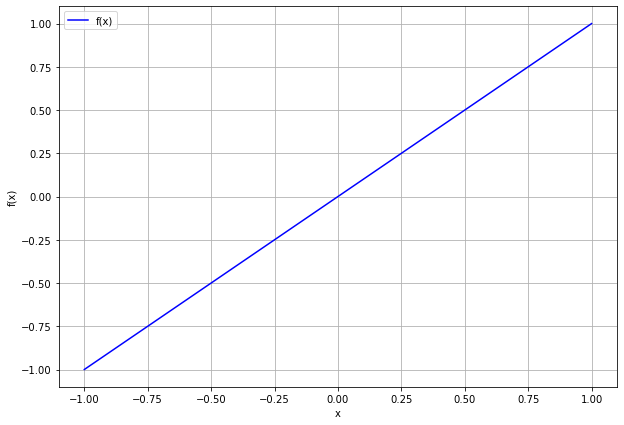

In [48]:
#c)
plt.figure()
plt.figure(figsize=(10,7))
plt.plot(xi,V, color='blue', label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()